In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.image as mpimg
from IPython.display import display
import os
import random
from operator import itemgetter

class_lables = {0: 'ben_afflek', 1: 'carlos', 2: 'elton_john', 3: 'jerry_seinfeld', 4: 'madonna', 5: 'meghan', 6: 'mindy_kaling'}

print(class_lables)

saved_model = load_model('code/modelos/model_1.h5')
resultado_general=[]
data={}

Using TensorFlow backend.


{0: 'ben_afflek', 1: 'carlos', 2: 'elton_john', 3: 'jerry_seinfeld', 4: 'madonna', 5: 'meghan', 6: 'mindy_kaling'}


In [12]:
folder = "data_set/Check"
imagenes = os.listdir(folder)
print(imagenes)

['Copia de ba2.jpg', 'Copia de ej1.jpg', 'Copia de md1.jpg', 'Copia de md2.jpg', 'Copia de ba1.jpg', 'mindy.jpg', 'Jerryseinfe.jpg']


In [4]:
j=0
a2 = "class_lables["
a3 = "], resultado_indice["
maximun = len(class_lables)
f1=""
f2=""
for i in range(0,len(class_lables)):
  if i == maximun-1:
    a4 = "]*100"
    a1 = "{}, {:.2f}%"
  else:
    a4 = "]*100,"
    a1 = "{}, {:.2f}%\\n"
  f1 = f1 + a1
  f2 = f2 + a2 + str(j) + a3 + str(j) + a4
  j= j+1
finalsentence = "'"+str(f1)+"'"+".format("+str(f2)+")"
print(finalsentence)


'{}, {:.2f}%\n{}, {:.2f}%\n{}, {:.2f}%\n{}, {:.2f}%\n{}, {:.2f}%\n{}, {:.2f}%\n{}, {:.2f}%'.format(class_lables[0], resultado_indice[0]*100,class_lables[1], resultado_indice[1]*100,class_lables[2], resultado_indice[2]*100,class_lables[3], resultado_indice[3]*100,class_lables[4], resultado_indice[4]*100,class_lables[5], resultado_indice[5]*100,class_lables[6], resultado_indice[6]*100)


In [0]:

def Chequear(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    x = x.astype('float32')/255
    tipo_de_clase = saved_model.predict(x)
    predicion = np.argmax(tipo_de_clase)
    resultado_indice = np.squeeze(tipo_de_clase)
    #print(resultado_indice)
    posicion_maximo_resultado = np.argmax(resultado_indice)
    #print(posicion_maximo_resultado)
    #print(resultado_indice[posicion_maximo_resultado])
    for i in range(0,len(class_lables)):
      resultado_general.append(resultado_indice[i])
      data.update({class_lables[i]:resultado_indice[i]})
    df = pd.DataFrame(data,index=[0])
    df2 = df.transpose()
    df2 = df2.reset_index()
    df2 = df2.rename(columns={'index':'class',0:'porcentaje'})
    df2['porcentaje'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df2['porcentaje']], index = df2.index)
    display(df2)
    #print(resultado_general)
    #print(data)
    img=mpimg.imread(path)
    plt.imshow(img)
    plt.title("{}, {:.2f}%".format(class_lables[predicion], resultado_indice[posicion_maximo_resultado]*100))
    plt.show()
    print("OMG is {}!!!.".format(class_lables[predicion]))

,class,porcentaje
0,ben_afflek,90.81%
1,carlos,1.28%
2,elton_john,0.05%
3,jerry_seinfeld,7.84%
4,madonna,0.02%
5,meghan,0.00%
6,mindy_kaling,0.00%


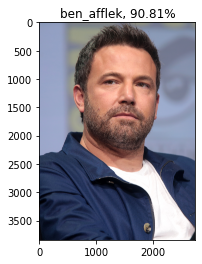

OMG is ben_afflek!!!.


In [6]:
Chequear('data_set/Check/ba1.jpg')

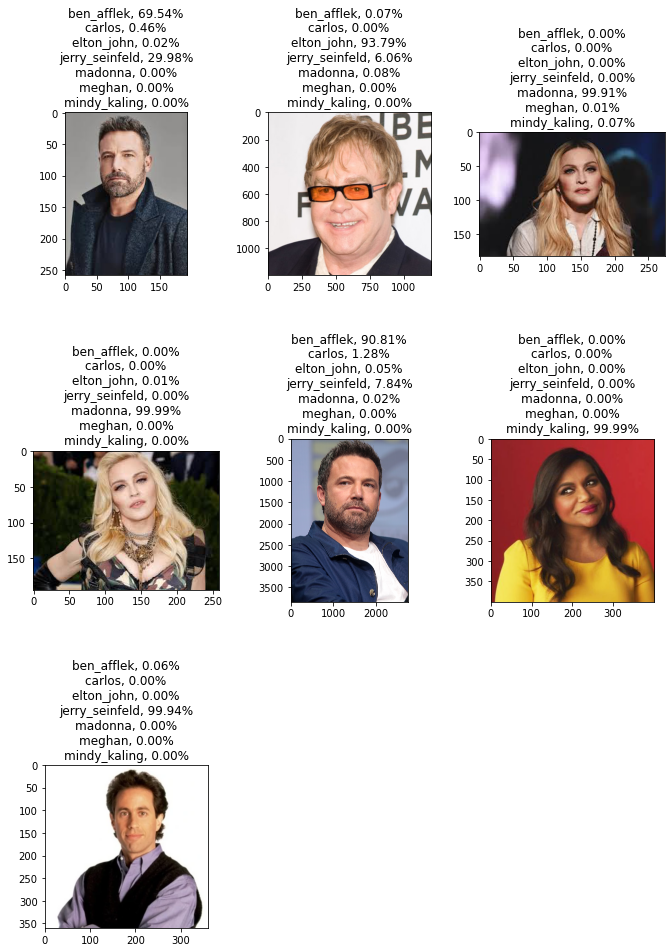

In [13]:
folder = "data_set/Check"
imagenes = os.listdir(folder)
ni = 0
plt.figure(figsize=[27,27],)
plt.subplots_adjust(wspace=0.2,hspace=1,right=0.45)


for j in range(0,len(imagenes)):
  path=(folder+imagenes[ni])
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  x = x.astype('float32')/255
  tipo_de_clase = saved_model.predict(x)
  predicion = np.argmax(tipo_de_clase)
  resultado_indice = np.squeeze(tipo_de_clase)
  posicion_maximo_resultado = np.argmax(resultado_indice)
  plt.subplot(5,3,j+1)
  plt.title(eval(finalsentence))
  #plt.title('{}, {:.2f}%\n\n{}, {:.2f}%\n\n{}, {:.2f}%'.format(
  #    class_lables[0], resultado_indice[0]*100,
  #    class_lables[1], resultado_indice[1]*100,
  #    class_lables[2], resultado_indice[2]*100))
  im = mpimg.imread(path)
  ni+=1
  imgplot = plt.imshow(im)
plt.show()

In [0]:
import urllib.request

def Chequear_url(url):
    urllib.request.urlretrieve(url, "/content/drive/My Drive/Final_Project/url_prueba_cara/test1.jpg")
    path = "/content/drive/My Drive/Final_Project/url_prueba_cara/test1.jpg"
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    x = x.astype('float32')/255
    tipo_de_clase = saved_model.predict(x)
    predicion = np.argmax(tipo_de_clase)
    resultado_indice = np.squeeze(tipo_de_clase)
    posicion_maximo_resultado = np.argmax(resultado_indice)
    for i in range(0,len(class_lables)):
      resultado_general.append(resultado_indice[i])
      data.update({class_lables[i]:resultado_indice[i]})
    df = pd.DataFrame(data,index=[0])
    df2 = df.transpose()
    df2 = df2.reset_index()
    df2 = df2.rename(columns={'index':'class',0:'porcentaje'})
    df2['porcentaje'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df2['porcentaje']], index = df2.index)
    display(df2)
    img=mpimg.imread(path)
    plt.imshow(img)
    plt.title("{}, {:.2f}%".format(class_lables[predicion], resultado_indice[posicion_maximo_resultado]*100))
    plt.show()
    print("OMG is {}!!!.".format(class_lables[predicion]))

,class,porcentaje
0,ben_afflek,98.72%
1,carlos,0.97%
2,elton_john,0.03%
3,jerry_seinfeld,0.26%
4,madonna,0.01%
5,meghan,0.00%
6,mindy_kaling,0.01%


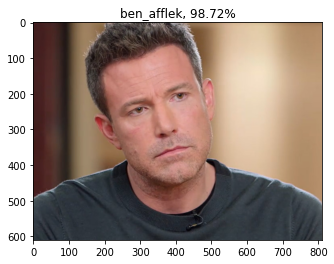

OMG is ben_afflek!!!.


In [0]:
Chequear_url('https://toofab.akamaized.net/2020/02/21/ben-affleck-gma-main-810x610.jpg')